## Coding Exercise #0303

### 1. Descriptive statistics:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the data.
df = pd.read_csv('data_studentlist.csv', header='infer')

print the shape of df

In [3]:
df.shape

(17, 8)

display the first 5 lines of the data 

In [4]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


#### 1.1. Sample statistics:

calculate the mean of height

In [5]:
df.height.mean()
#df["height"].mean()

170.03529411764703

ge the unbiased estimator of the variance (i.e divided by $n-1$). (hint : read the documentation of ``var`` )

In [7]:
# Unbiased estimator of the variance.
df.height.var(ddof=1)

61.61867647058827

same as the above but with std 

In [8]:
# Unbiased estimator of the standard deviation.
df.height.std(ddof=1)

7.849756459316955

calculate the : mean , median , min and max of the ``height`` column

In [10]:
# Median.
print(f" the median is  {df.height.median()}, the min is {df.height.min()} , the max is {df.height.max()}")


 the median is  169.2, the min is 155.2 , the max is 182.1


get the quantile at $alpha = 0.1$ (hint : read the documentation dataframe.quantile)

In [11]:
# Quantile at alpha = 0.1
df.height.quantile(0.1)

160.48

same as the above but with $alpha = 0.9$

In [12]:
# Quantile at alpha = 0.9
df.height.quantile(0.9)

179.1

#### 1.2. Boxplot: 

use what you've learned to calculate the inter quantile range using its forumla 

In [13]:
# The Inter Quartile Range
iqr = df.height.quantile(0.75) - df.height.quantile(0.25)
iqr

10.799999999999983

plot the box plot of ``height`` and ``weight`` using seaborn

d:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='height'>

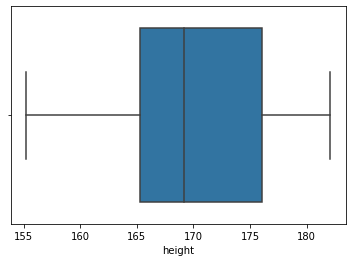

In [16]:
# Show a Boxplot for the height.
sns.boxplot(df["height"])

d:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

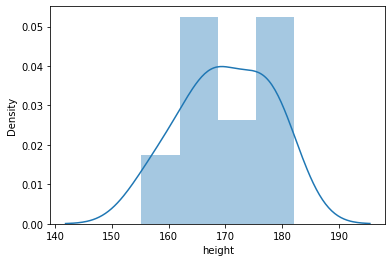

In [19]:
sns.distplot(df["height"])

d:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weight'>

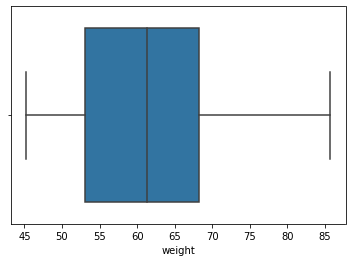

In [18]:
sns.boxplot(df["weight"])

d:\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

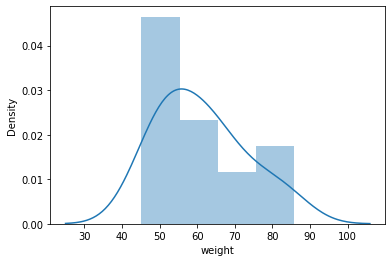

In [20]:
sns.distplot(df["weight"])

In [22]:
df["weight"].skew()

0.6195151099956852

#### 1.3. Covariance and Correlation:

calculate the   covariance between  ``height`` and ``weight`` using ``cov`` function

In [25]:
# Covariance.

cov=df.height.cov(df.weight)

calculate the   correlation between  ``height`` and ``weight``

In [24]:
# Correlation.
df.height.corr(df.weight)

0.6641815979588611

calculate the correlation between ``height`` and ``weight`` using the covariance between the two

In [26]:
# Calculate the correlation using the covariance.
cov/(df.height.std()*df.weight.std())

0.6641815979588612

#### 1.4. Visualization:

show the relationship between ``weight`` and ``height`` ( find the appropriate plot to showcase the correlation between two numerical variables)

<AxesSubplot:xlabel='weight', ylabel='height'>

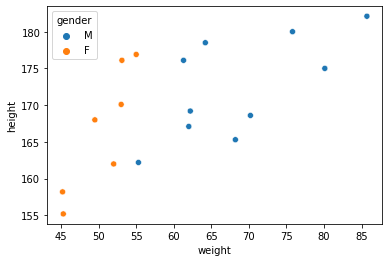

In [32]:
# Visually inspect the relationship between X and Y.
sns.scatterplot(x="weight",y="height",data=df,hue="gender")

the goal of this last question is to seperate your dataset into male and female group. 
plot two overlapping scatter plots of these groups with different colors

**remark** : 

if you run the following code , you will get two different plots , find a way to mitigate this problem

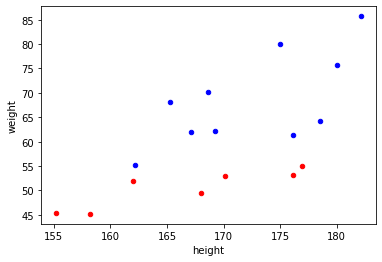

In [31]:
# Visually inspect the relationship between X and Y.
# Distinguish the gender by color.

base=df[df.gender=='M'].plot.scatter(x='height', y='weight',color='blue',marker='o',s=20)
df[df.gender=='F'].plot.scatter(x='height', y='weight',color='red',marker='o',s=20,ax=base)
plt.show()

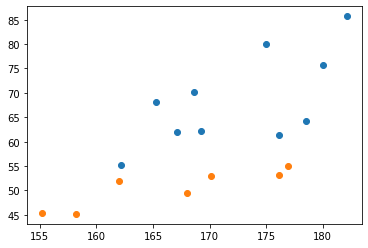

In [30]:
mask= df.gender=="M"
plt.scatter(df[mask]["height"],df[mask]["weight"])
plt.scatter(df[~mask]["height"],df[~mask]["weight"])